# Prediction of CO2 emissions from country-specific data
# A Machine Learning project 
### by Vladislav Todorov

***

# Stage 3: Predictive data analysis with the Random Forest machine learning algorithm

***

### Notebook Contents:

0. Introduction - project and notebook summaries, notes on the data source
1. Notebook setup - libraries and data import, dealing with randomness in the algorithms
2. Data overview
3. Used feature/column abbreviations
3. Hypothesis to be tested
4. Selection of dependent and independent variables
5. Dataset splitting into training and testing subsets
6. Feature selection with recursive feature elimination and cross-validation
7. Hyperparameter tuning of a random forest model with cross-validation
8. Train and evaluate the model with the best hyperparameters on the training data with cross-validation
9. Validate the model on the test subset (previously unseen data)
10. Conclusions

***

## 0. Introduction

## Project summary
**Aim of the project**:
Analysis of country-specific data and development of machine learning models in order to predict CO2 emissions from country parameters. The project uses the publicly available dataset Climate Change Data from the World Bank Group, which provides data on the vast majority of countries over a range of years for parameters such as:

   - country: the vast majority of countries worldwide
   - year: ranging from 1990 to 2011
   - CO2 emissions
   - energy use
   - population count
   - urban population
   - cereal yield
   - nationally terrestrial protected areas
   - GDP, GNI
   - etc.

The project is divided into three stages:

1. Data cleaning and preparation
2. Data exploration and visualization
3. Predictive analysis with the Random Forest machine learning algorithm

Each of the stages is described in a separate Jupyter Notebook(.ipynb file) and a derived pdf file.

***

## Notebook summary - Stage 3: Predictive data analysis with the Random Forest machine learning algorithm

**Aim of this notebook**: This notebook will show the steps taken to develop a predictive Random Forest model by using the scikit-learn library. 

**Input**:
* csv data file produced by the script 1_data_exploration.py (output of Stage 1)
* trends and relationship insights gained during data visualization (output of Stage2)

**Output**:
* a predictive Random Forest model and its corresponding metrics by evaluating unseen data

**Programming language**: Python 3.7

**Libraries used in this notebook**: sklearn, numpy, pandas, seaborn, matplotlib, sys

***

### Data source

The used data comes from the Climate Change Data of the World Bank Group, which provides country-specific data on parameters such as CO2 emissions, energy use, population count, urban population, cereal yield, nationally terrestrial protected areas, GDP, GNI, etc.


The dataset is publicly available at https://datacatalog.worldbank.org/dataset/climate-change-data and licenced under the <a href="https://datacatalog.worldbank.org/public-licenses#cc-by">Creative Commons Attribution 4.0 International license</a>.

***

## 1. Notebook Setup
Libraries and dataset import:

In [1]:
# import all needed libraries
import pandas as pd
import numpy as np
import numpy.random as nr
import sys
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn.model_selection as ms
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import feature_selection as fs

# load the cleaned dataset
data = pd.read_csv(r'data_cleaned.csv')

### Dealing with randomness in the algorithms

Since multiple methods involve certain levels of randomness (e.g. during the trees definition in the random forest algorithm, the dataset splitting and the cross-validations), it is necessary to ensure the reproducibility of the results at each script run. This is done by setting a random_state parameters for all these actions, as well as the state of randomness before each of them by numpy.random.seed():

In [2]:
# define a random state number for all random operations - ensures reproducibility of all results
random_state_num = 0

***

## 2. Overview of the available data
A global overview of the imported data yields the following insights:

In [3]:
print("Shape of the dataset:")
data.shape

Shape of the dataset:


(1700, 18)

In [4]:
print("available columns and their data types:")
data.dtypes

available columns and their data types:


country                 object
year                     int64
cereal_yield           float64
fdi_perc_gdp           float64
en_per_gdp             float64
en_per_cap             float64
co2_ttl                float64
co2_per_cap            float64
co2_per_gdp            float64
pop_urb_aggl_perc      float64
prot_area_perc         float64
gdp                    float64
gni_per_cap            float64
under_5_mort_rate      float64
pop_growth_perc        float64
pop                    float64
urb_pop_growth_perc    float64
urb_pop                float64
dtype: object

In [5]:
print("Overview of the first 5 rows:")
data.head()

Overview of the first 5 rows:


,country,year,cereal_yield,fdi_perc_gdp,en_per_gdp,en_per_cap,co2_ttl,co2_per_cap,co2_per_gdp,pop_urb_aggl_perc,prot_area_perc,gdp,gni_per_cap,under_5_mort_rate,pop_growth_perc,pop,urb_pop_growth_perc,urb_pop
0,AGO,1991,417.4,5.449515,179.271884,565.451027,4367.397,0.409949,129.971142,15.290728,12.399822,1.219375e+10,820.0,239.1,3.034866,10653515.0,6.687032,4.099473e+06
1,ARE,1991,1594.0,0.076475,245.977706,12262.388130,57010.849,29.851550,598.807980,26.377204,0.266886,3.391964e+10,19340.0,20.5,5.442852,1909812.0,5.265704,1.507988e+06
2,ARG,1991,2666.1,1.285579,173.122857,1434.960601,117021.304,3.536073,426.614517,39.119646,4.772468,1.897200e+11,3960.0,25.8,1.372593,33093579.0,1.762636,2.890393e+07
3,AUS,1991,1603.3,1.306912,208.686644,4926.727783,281530.258,16.288490,689.948873,60.356798,7.915273,3.299655e+11,18380.0,8.6,1.274577,17284000.0,1.438378,1.478473e+07
4,AUT,1991,5463.0,0.209142,128.939160,3381.073790,65888.656,8.448456,322.186648,19.746121,20.991143,1.721664e+11,21200.0,8.9,1.134999,7798899.0,1.134999,5.131676e+06


In [6]:
print("Descriptive statistics:")
data.describe()

Descriptive statistics:


,year,cereal_yield,fdi_perc_gdp,en_per_gdp,en_per_cap,co2_ttl,co2_per_cap,co2_per_gdp,pop_urb_aggl_perc,prot_area_perc,gdp,gni_per_cap,under_5_mort_rate,pop_growth_perc,pop,urb_pop_growth_perc,urb_pop
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1.700000e+03,1700.000000,1700.000000,1700.000000,1700.000000,1.700000e+03,1700.000000,1700.000000,1700.000000,1.700000e+03,1700.000000,1.700000e+03
mean,1999.570588,3013.317581,2.948940,249.822736,1968.979736,9.793999e+05,4.676663,482.303784,21.480126,12.201789,1.058568e+12,7898.668664,51.971955,1.451313,3.060142e+08,2.252231,1.347903e+08
std,5.143070,1796.206082,3.949722,186.195019,1959.419972,3.235692e+06,4.906273,392.192230,12.105158,9.116682,3.921323e+12,11592.516937,51.332162,1.129312,9.482329e+08,1.642009,4.145755e+08
min,1991.000000,175.700000,-15.027675,66.335372,116.511476,7.077310e+02,0.029411,45.552592,3.526316,0.000000,9.826326e+08,80.000000,3.200000,-2.397174,1.909812e+06,-2.757210,1.151309e+06
25%,1995.000000,1683.364736,0.834105,136.320490,542.882788,1.462125e+04,0.922769,257.139562,12.383953,5.839844,1.636221e+10,780.000000,10.000000,0.630306,9.973065e+06,0.925308,5.469794e+06
50%,2000.000000,2584.800000,1.993220,197.624918,1089.225939,7.728386e+04,3.093346,368.415567,18.525960,10.293791,9.882942e+10,2150.770301,32.350000,1.519890,2.689207e+07,2.315122,1.423239e+07
75%,2004.000000,3933.400000,3.702149,286.474936,2893.996077,3.708446e+05,7.441195,586.972993,28.988324,16.599298,4.122600e+11,9205.000000,79.925741,2.276853,8.234386e+07,3.364747,4.835246e+07
max,2008.000000,8410.800000,51.373951,1383.380011,12607.839262,3.064936e+07,37.106499,3343.454250,60.505780,53.749825,5.580488e+13,58620.000000,239.100000,11.180657,6.610030e+09,12.829046,3.264974e+09


### Dealing with outliers

Stage 2 (Data exploration and visualization of the project) has revealed a group of outliers far away from the main data point group for almost all analyzed relationships. These correspond to the data series on the country code *ARE* (standing for the United Arab Emirates).

For the purpose of clearer representation of the model results and a better understanding of its functionality, these outliers will be removed from the further analysis:

In [7]:
# remove the ARE outliers
data = data[data['country']!='ARE']

# print shape after removing the outliers
print("Shape of the dataset after removing the ARE outliers:")
data.shape

Shape of the dataset after removing the ARE outliers:


(1686, 18)

***

## 3. Used feature/column abbreviations

The features/columns were given in Stage 1 clearer abbreviations in order to ensure easies understanding, representation and coding. These are listed in the following table together with the corresponding units:

<table>
    <tr>
        <td> <b> Variable name </b> </td>
        <td> <b> Description </b> </td>
        <td> <b> Unit </b> </td>
    </tr>
    <tr>
        <td> cereal_yield </td>
        <td> Cereal yield </td>
        <td> kg per hectare </td>
    </tr>
    <tr>
        <td> fdi_perc_gdp </td>
        <td> Foreign direct investment, net inflows </td>
        <td> % of GDP </td>
    </tr>
    <tr>
        <td> en_per_gdp </td>
        <td> Energy use per units of GDP </td>
        <td> kg oil eq./\$1,000 of 2005 PPP \$ </td>
    </tr>
    <tr>
        <td> en_per_cap </td>
        <td> Energy use per capita </td>
        <td> kilograms of oil equivalent </td>
    </tr>
    <tr>
        <td> co2_ttl </td>
        <td> CO2 emissions, total </td>
        <td> KtCO2 </td>
    </tr>
    <tr>
        <td> co2_per_cap </td>
        <td> CO2 emissions per capita </td>
        <td> metric tons </td>
    </tr>
    <tr>
        <td> co2_per_gdp </td>
        <td> CO2 emissions per units of GDP </td>
        <td> kg/\$1,000 of 2005 PPP \$ </td>
    </tr>
    <tr>
        <td> pop_urb_aggl_perc </td>
        <td> Population in urban agglomerations >1million </td>
        <td> % </td>
    </tr>
    <tr>
        <td> prot_area_perc </td>
        <td> Nationally terrestrial protected areas </td>
        <td> % of total land area </td>
    </tr>
    <tr>
        <td> gdp </td>
        <td> Gross Domestic Product (GDP) </td>
        <td> \$ </td>
    </tr>
    <tr>
        <td> gni_per_cap </td>
        <td> GNI per capita </td>
        <td> Atlas \$ </td>
    </tr>
    <tr>
        <td> under_5_mort_rate </td>
        <td> Under-five mortality rate </td>
        <td> per 1,000 </td>
    </tr>
    <tr>
        <td> pop_growth_perc </td>
        <td> Population growth </td>
        <td> annual % </td>
    </tr>
    <tr>
        <td> pop </td>
        <td> Population </td>
        <td> 1 </td>
    </tr>
    <tr>
        <td> urb_pop_growth_perc </td>
        <td> Urban population growth </td>
        <td> annual % </td>
    </tr>
    <tr>
        <td> urb_pop </td>
        <td> Urban population </td>
        <td> 1 </td>
    </tr>
    
</table>

***
## 4. The hypothesis to be investigated

**The hypothesis to be tested is defined as follows**: the CO2 emissions depend on the rest of the country-specific features available in the dataset such as energy use, various population metrics, GDP, FNI, cereal yield, etc. and can be predicted from these.

***

## 5. Selection of dependent and independent variables

During the previous stage of the project (Stage 2: Data exploration and visualization) were defined the features which have the biggest potential to build as many dependencies as possible. The features were chosen as follows:

* dependent variable (DV) to be predicted: 
    - co2_percap*: CO2 emissions per capita (metric tons)
* features/independent variables:
    - 'cereal_yield': Cereal yield (kg per hectare)
    - 'fdi_perc_gdp': Foreign direct investment, net inflows (% of GDP)
    - 'gni_per_cap': GNI per capita (Atlas \\$)
    - 'en_per_cap': Energy use per capita (kilograms of oil equivalent)
    - 'pop_urb_aggl_perc': Population in urban agglomerations >1million (\%)
    - 'prot_area_perc': Nationally terrestrial protected areas (\% of total land area)
    - 'gdp': GDP (\\$)
    - 'pop_growth_perc': Population growth (annual \%)
    - 'urb_pop_growth_perc': Urban population growth (annual \%)


These are accordingly defined as features (IVs) and labels (DV) and transformed to numpy arrays for the further input into the random forest model (the DV is denominated in the code as "labels"/"label":

In [8]:
# choose features and label columns
feature_cols = ['cereal_yield','fdi_perc_gdp','gni_per_cap', 'en_per_cap', 'pop_urb_aggl_perc',
                    'prot_area_perc', 'gdp',  'pop_growth_perc', 'urb_pop_growth_perc']
label_col = ['co2_per_cap']

# convert into nympy arrays (required for scikit-learn models)
features = np.array(data[feature_cols])
labels =  np.array(data[label_col])

***

## 6. Dataset splitting into training and testing subsets

The developed model should be validated on previously unseen data. For this purpose, the dataset will be divided into a training and testing subset with the ratio of 3:7 respectively. Additionally, in order to achieve better generalization of the predictions, cross-validation will be used on the training set for the purposes of feature selection, hyperparameter tuning and the evaluation of the model with the best features.

The dataset splitting is executed in the following snippet:

In [9]:
# split into training and testing subsets
nr.seed(1)
features_train, features_test, labels_train, labels_test = train_test_split(features,
                                                                            labels,
                                                                            test_size=0.7,
                                                                            random_state=random_state_num)

### Scaling of the features

Some machine learning algorithmns like Linear or Logistic Regression require prior scaling/normalization of the variables in order to avoid a bias of the model towards variables with higher magnitude. However, since Random Forest is based on decision trees which do not rely on regression coefficients, such transformation is not necessary in this case.

***

## 7. Feature selection with cross-validation

Having a high ratio of features to data points has the following disadvantages:
* Not all features are expected to have an important influence when predicting the CO2 emissions.
* Some features are correlated among each other and therefore partially duplicate their influence on the DV (multicollinearity of the variables). Having additional correlated features gives no additional information gain when learning the training set and is for some machine learning algorithms not allowed.
* Sometimes a too many variables means too many degrees of freedom for the algorithm, leading to overfitting on the training set and therefore reducing prediction generalization/precision on newly unseen data.
    
This is why it is necessary to conduct feature selection, in other words - to decide which features would be most suitable for the current predictive challenge. For the purpose of better prediction generalization on new data, the features are selected by evaluating a Random Forest model for different combinationf of features involved, simultaneously using cross-validation.

The feature ranking class sklearn.feature_selection.RFECV used here incorporates recursive feature elimination and cross-validated selections. Once fitted to the training data, it ranks the models with the different features by the R2 score and returns this rank. Consequently, only the most relevant features are kept for the further analysis for both the training and testing dataset (variables features_train_reduced and features_test_reduced).

In [10]:
# Set folds for cross validation for the feature selection
nr.seed(1)
feature_folds = ms.KFold(n_splits=4, shuffle = True, random_state=random_state_num)

# Define the model
rf_selector = RandomForestRegressor(random_state=random_state_num) 

# Define an objects for a model for recursive feature elimination with CV
nr.seed(1)
selector = fs.RFECV(estimator = rf_selector, cv = feature_folds, scoring = 'r2', n_jobs=-1)

selector = selector.fit(features_train, np.ravel(labels_train))
selector.support_

print("Feature ranking after RFECV:")
print(selector.ranking_)

# print the important features
ranks_transform = list(np.transpose(selector.ranking_))
chosen_features = [i for i,j in zip(feature_cols,ranks_transform) if j==1]
print("Chosen important features:")
print(chosen_features)

Feature ranking after RFECV:
[1 3 5 1 1 1 2 1 4]
Chosen important features:
['cereal_yield', 'en_per_cap', 'pop_urb_aggl_perc', 'prot_area_perc', 'pop_growth_perc']


According to the feature rankings, the important parameters for this data set (with ranking 1) are 'cereal_yield', 'en_per_cap', 'pop_urb_aggl_perc', 'prot_area_perc', 'pop_growth_perc'.

Consequently, only these will be kept for the further analysis for both the training and testing dataset (variables *features_train_reduced* and *features_test_reduced*):

In [11]:
# assign only the important variables to the features array of both training and testing dataset
features_train_reduced = selector.transform(features_train)
features_test_reduced = selector.transform(features_test)

print("Training subset shape before the recursive feature elimination:")
print(features_train.shape)
print("Training subset array shape after the recursive feature elimination:")
print(features_train_reduced.shape)
print("Test subset array shape after the recursive feature elimination:")
print(features_test_reduced.shape)

Training subset shape before the recursive feature elimination:
(505, 9)
Training subset array shape after the recursive feature elimination:
(505, 5)
Test subset array shape after the recursive feature elimination:
(1181, 5)


***

## 8. Hyperparameter tuning

Random Forest is an algorithm with multiple hyperparameters which can have a range of values. In order to find the hyperparameters which would be most suitable for the current data, it is necessary to conduct hyperparameter tuning. The parameters which will be tuned in this case are:

* n_estimators - number of decision trees in the random forest
* max_features - number of features to consider at every split
* max_depth - maximum number of levels in a tree
* min_samples_split - minimum number of samples required to split a node
* min_samples_leaf - minimum number of samples required at each leaf node

The tuning is executed by applying a cross-validated evaluation of the model for different combinations of preliminary defined ranges for the parameters. The output is the model with the hyperparameters which exhibits the best R2 score compared to other parameter combinations.

Define the hyperparameter ranges to be investigated as a parameter grid (dictionary *param_grid*):

In [12]:
# Define value ranges for each hyperparameter
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

# Create the hyperparameter grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

Define the RandomizedSearchCV object, which will evaluate the R2 scores of models with randomly picked combinations from the defined hyperparameter grid:

In [13]:
# define the cross-validation folds for the hyperparameter tuning
nr.seed(1)
inside_folds = ms.KFold(n_splits=5, shuffle = True, random_state=random_state_num)

# Define the random forest regressor model object
rf_tuner = RandomForestRegressor(random_state=random_state_num)

# Perform a randomized search on the grid
nr.seed(1)
rf_model = ms.RandomizedSearchCV(estimator=rf_tuner, param_distributions = param_grid,
                                 random_state=random_state_num, refit=True,
                                 cv=inside_folds, scoring = 'r2', return_train_score=True, n_jobs=-1)

Once fitted to the training data, it will return a Random Forest model in the *best_estimator_* parameter with the hyperparameter combination which allows for the best r2 score for the current data among all the tested parameter combinations.

It should be noted, that after the model with the best R2 score and thus best hyperparameter combination has been found, it will be refitted to the training data (notice the parameter *refit=True* of the *RandomizedSearchCV* object).

Subsequently, the best hyperparameters are printed:

In [14]:
# Fit the grid search model object with cross-validation on the data
rf_model.fit(features_train_reduced, np.ravel(labels_train))

# Print the best parameter value
best_n_estimators = rf_model.best_estimator_.n_estimators
best_max_features = rf_model.best_estimator_.max_features

print("best number of estimators:")
print(best_n_estimators)
print("best max_features:")
print(best_max_features)
print("max_depth:")
print(rf_model.best_estimator_.max_depth)
print("min_samples_split")
print(rf_model.best_estimator_.min_samples_split)
print("min_samples_leaf")
print(rf_model.best_estimator_.min_samples_leaf)

best number of estimators:
1600
best max_features:
sqrt
max_depth:
20
min_samples_split
2
min_samples_leaf
1


Assign the best model to the model variable *rf_best_model* to be used further:

In [15]:
# pick the model with the best hyperparameter combination for further analysis
rf_best_model = rf_model.best_estimator_

***

## 9. Evaluation of the model with the best hyperparameters on the training subset with cross-validation

The random forest model object *rf_best_model* with the most important features and the most suitable hyperparameters will be now evaluated on the training subset with cross-validation first:

In [16]:
# define the cross-validation folds for the evaluation
nr.seed(1)
outside_folds = ms.KFold(n_splits=10, shuffle = True, random_state=random_state_num)

# Evaluate the model on the training subset with cross-validation
nr.seed(1)
cv_eval = cross_val_score(rf_best_model, features_train_reduced, labels_train, cv = outside_folds, n_jobs=-1)

print('Mean R2 score of all CV folds = %4.3f' % np.mean(cv_eval))
print('Standard deviation of the R2 score over all folds = %4.3f' % np.std(cv_eval))
print('R2 score for each fold:')

# print the R2 score for each fold
for i, j in enumerate(cv_eval):
    print('Fold %2d    %4.3f' % (i+1, j))

Mean R2 score of all CV folds = 0.968
Standard deviation of the R2 score over all folds = 0.017
R2 score for each fold:
Fold  1    0.946
Fold  2    0.963
Fold  3    0.968
Fold  4    0.982
Fold  5    0.956
Fold  6    0.935
Fold  7    0.989
Fold  8    0.983
Fold  9    0.986
Fold 10    0.972


At first, the high coefficient of determination R2=0.968 and the fact that the model has been trained and evaluated on the same training subset would suggest a strong overfitting. However, the training and evaluation on cross-validated folds improve the model generalization capabilities and the promising result of R2=0.968 stands for the mean R2 score for all folds.

Additionally, each of the 10 folds exhibits  R2 scores between 0.935 and 0.989 with a very small standard deviation of 0.017. This shows that the model has achieved good predictions for all the folds without any particular one that stands out with a worse result.

***

## 10. Validate the model on the testing subset

Finally, the model should be validated on previously unseen data, which is the initially separated test subset. The developed model *rf_best_model* is used to predict the CO2 emissions per capita based on the features of the test subset. The quality of the predictions is evaluated by the metrics R2 score, Mean Squared Error and Root Mean Squared Error:

In [17]:
# make predictions from the features of the testing subset
predictions = rf_best_model.predict(features_test_reduced)

# import the functions for the metrics evaluation
from sklearn.metrics import r2_score, mean_squared_error

# calculate the metrics basing on the predicted and true values for the test subset
r2 = r2_score(y_true=labels_test, y_pred=predictions)
mse = mean_squared_error(y_true=labels_test, y_pred=predictions)
rmse = np.sqrt(mse)

print("R2=")
print(r2)
print("Mean Squared Error: MSE=")
print(mse)
print("Root Mean Squared Error: RMSE=")
print(rmse)

R2=
0.968051196455394
Mean Squared Error: MSE=
0.6118032753831466
Root Mean Squared Error: RMSE=
0.7821785444405559


The obtained R2 score of 0.968 might seem quite optimistic at first. However, following the measures have been taken to avoid overfitting and increase confidence of generalization:
* dataset splitting with only 30% of the observations as a training subset
* cross-calidation (during feature selection, hyperparameter tuning and the model training on the training subset)

The MSE and RMSE results cannot be compared with the magnitude of the DV (from 0t to 20t).

The quality of the predictions is additionally visualized in a regression plot depicting predicted values by the developed Random Forest model versus the true CO2 emissions per capita values (DV) from the test subset:

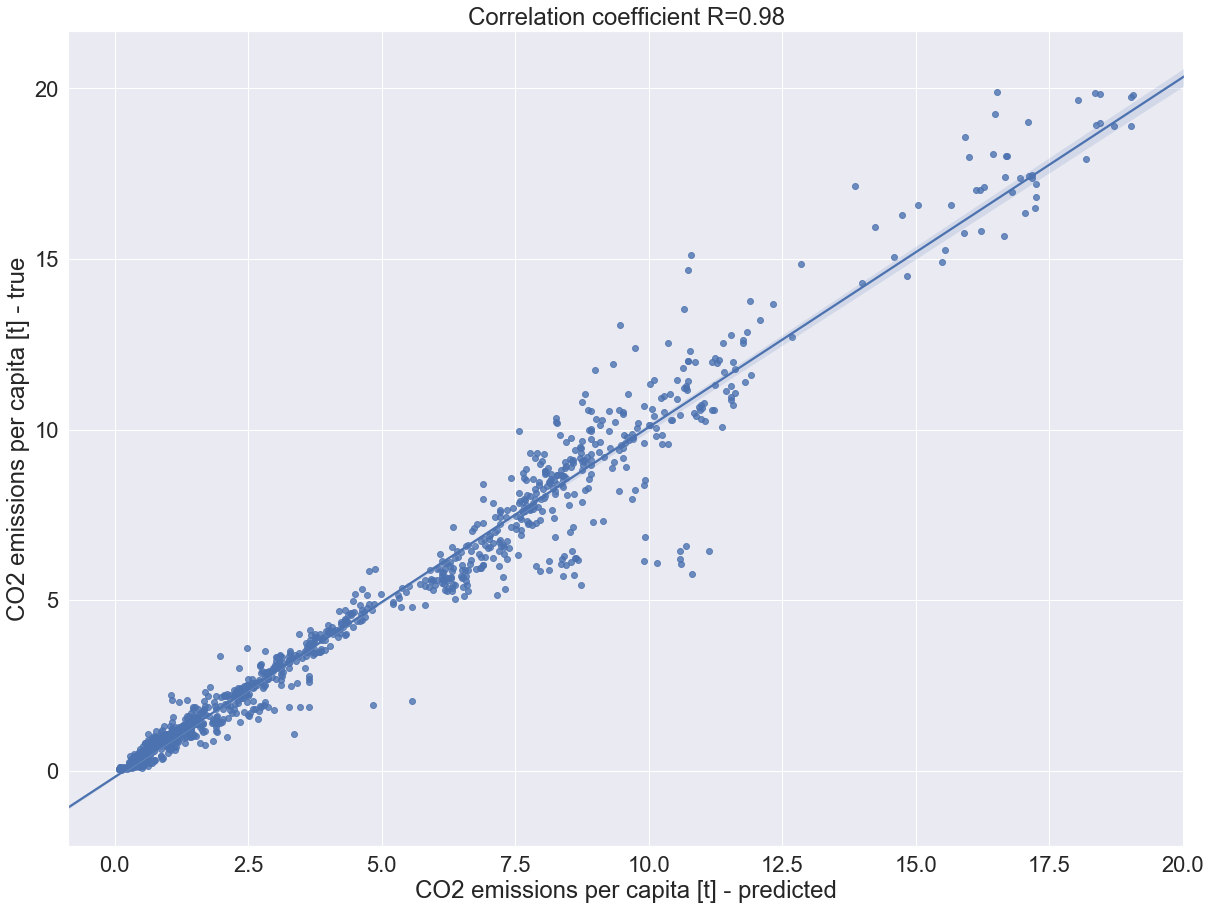

In [19]:
# plot predicted vs true values of the test subset

f,ax=plt.subplots(figsize=(20,15))
sns.set(font_scale=2)

sns.regplot(x=predictions, y=np.transpose(labels_test)[0,:], fit_reg=True)
plt.xlabel("CO2 emissions per capita [t] - predicted")
plt.ylabel("CO2 emissions per capita [t] - true")
plt.title("Correlation coefficient R="+str(round(np.corrcoef(predictions,np.transpose(labels_test)[0,:])[0,1],2)))
plt.show()

The predictions of the CO2 emissions correlate very well with their true values and their vast majority is observed on the regression line or in its immediate vicinity.

***

## 11. Conclusions

The following tasks have been successfully completed:
1. Data overview
4. Definition of dependent and independent variables
5. Dataset splitting into training and testing subsets
6. Feature selection by using recursive feature elimination with cross-validation
7. Hyperparameter tuning of a random forest model with cross-validation
8. Train and evaluate the model with the best hyperparameters on the training data with cross-validation
9. Validate the model on the test subset (previously unseen data)

During model development and training, all measures have been taken into account in order to ensure best possible generalization of the model on previously unseen data. Even in this case, the evaluation metrics yield the mean coefficient of determination of R2=0.968 on the cross-validated training set, as well as for each cross-validation fold. Moreover, the predictions from the test set feature data show a very promising correlation with the true values and a coefficient of determination of R2=0.968 as well. No particular outliers can be observed in the predictions plotted over the true values.

Although no confidence or prediction interval, nor any kind of probability value for the predictions have been estimated, the significant size of the test subset of 1181 (train/test subset size ratio of 3:7) suggests that the model does not show overfitting on the training subset and generalizes well on previously unseen data.

To sum up, **the used data allows the prediction of CO2 emissions per capita for a certain country over a year from the country-specific features 'cereal_yield', 'prot_area_perc', energy use per capita, cereal yield, nationally terestrial protected area percentage, percentage of population in urban agglomerations and percentage of population growth per year with a precision of R2=96.8%.**


***

Copyright (c) 2020 Vladislav Todorov